In [184]:
import xarray as xr # type: ignore
import cftime # type: ignore
import os
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import netCDF4 as nc # type: ignore
from datetime import datetime

from warnings import filterwarnings
filterwarnings('ignore')
from metpy.plots import SkewT 
from metpy.calc import cape_cin, parcel_profile, lcl # type: ignore
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
drive = "D:/"

os.listdir(drive)

['BEEF',
 'cape_and_stuff.nc',
 'Carnival Row',
 'ch PROJECT.ipynb',
 'chirps_21_WA_new.nc',
 'Chl.ds.Ply.2019.720p.wb-dl.x265.HEVC.Film2Movie_WS.mkv',
 'combined_data.nc',
 'ConveTransfer.msi',
 'data',
 'DESTINY',
 'era.nc',
 'everything-1.4.1.1024-installer.exe',
 'Flet',
 'hms_prj',
 'Hotel Management',
 'House.of.Ninjas.S01.COMPLETE.DUAL-AUDIO.JAP-ENG.1080p.10bit.WEBRip.6CH.x265.HEVC-PSA',
 'imerg_v07_daily_new.nc4',
 'KMS_VL_ALL_AIO_crackshash.zip',
 'new_era.nc',
 'Oppenheimer.2023.720p.BluRay.x264.YouthTrendx.mkv',
 'OUR DREAM WEDDING - CHINELO EJIANWU, JAMES GARDINER, PRECIOUS AKAEZE latest 2024 nigerian movies.mp4',
 'Rainfall_Ghana.csv',
 'Reacher',
 'System Volume Information']

In [3]:
#drive="D:/imerg_v07_daily_new.nc4"
drive="D:/chirps_21_WA_new.nc"

In [4]:
ds = xr.open_dataset(drive,engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:    (time: 14975, longitude: 140, latitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [5]:
ds_time = ds.sel(time=slice('2010','2018'))
ds_accra = ds_time.sel(latitude=5.6, longitude=0.17, method='nearest')
ds_accra

<xarray.Dataset>
Dimensions:    (time: 3287)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2018-12-31
    longitude  float32 0.125
    latitude   float32 5.625
Data variables:
    precip     (time) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [6]:
pre_df = ds_accra.to_dataframe().reset_index()

# Extract the year from the datetime index
pre_df['year'] = pre_df['time'].dt.year

# Group the data by year
grouped = pre_df.groupby('year')


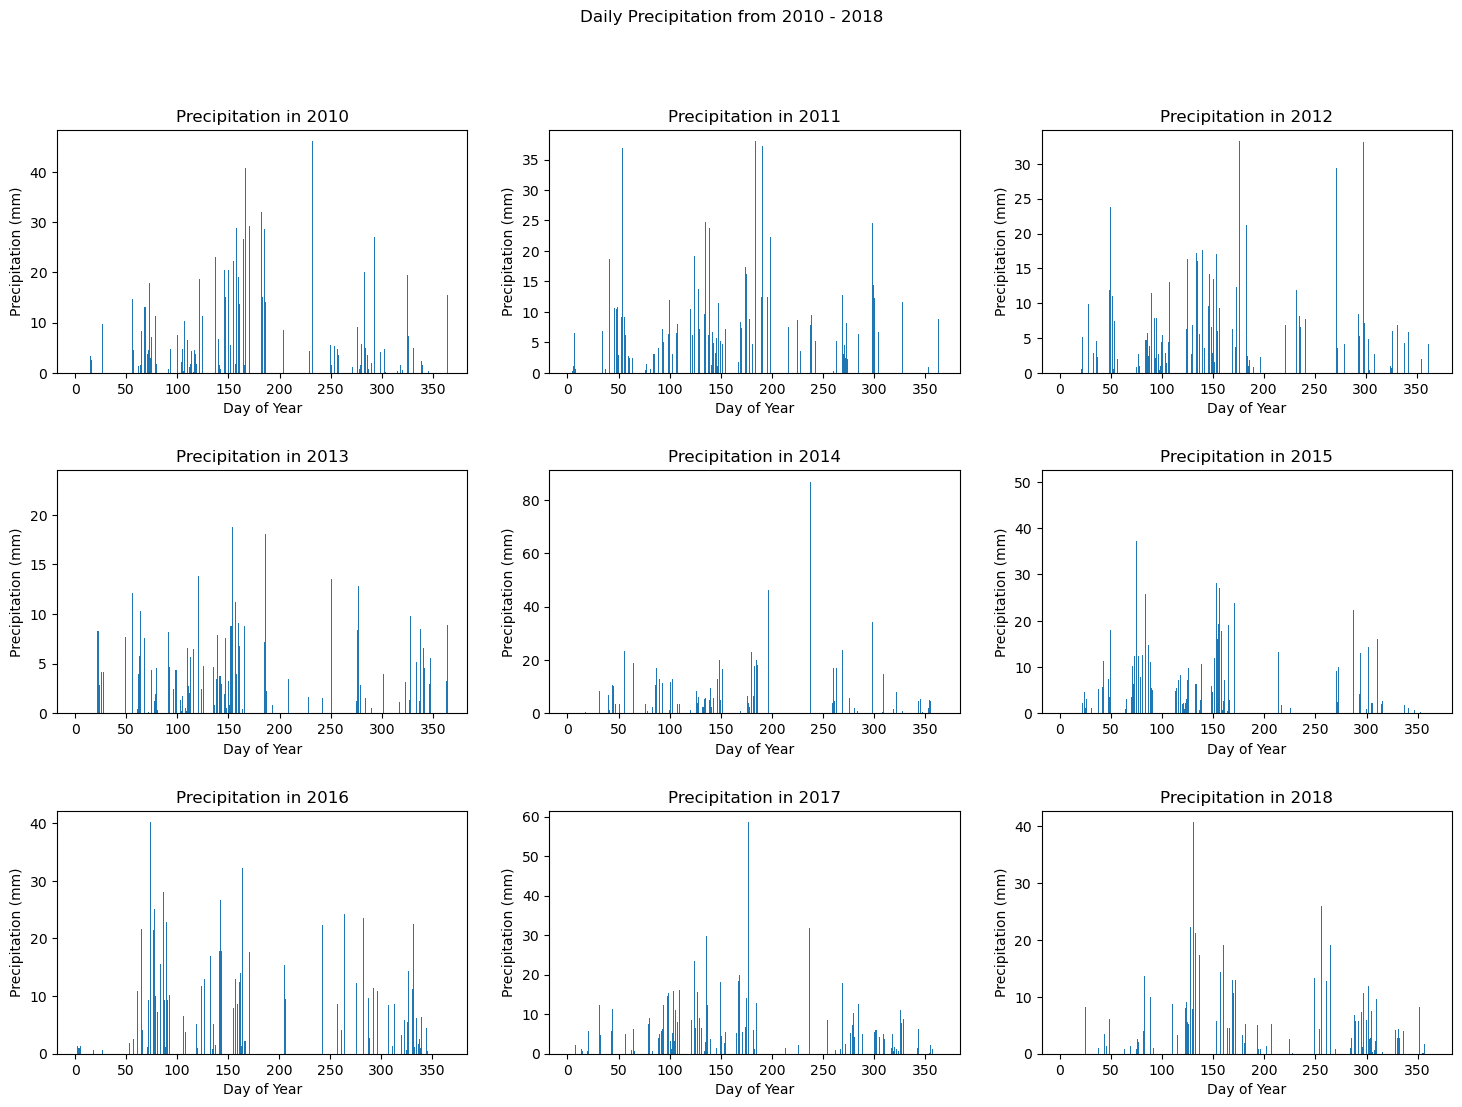

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4)

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Loop over the grouped data and corresponding axes
for ax, (year, data) in zip(axs, grouped):
    ax.bar(data['time'].dt.dayofyear, data['precip'])
    ax.set_title(f'Precipitation in {year}')
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Precipitation (mm)')

# Hide any unused subplots
# for ax in axs[len(grouped):]:
#     ax.axis('off')

# plt.show()
plt.suptitle("Daily Precipitation from 2010 - 2018")
plt.savefig("figures/Precipitation_daily_2010_2018.png", bbox_inches="tight", dpi=1200)

In [8]:
max_daily = ds_accra.groupby('time.year').max()
annual_tot = ds_accra.groupby('time.year').sum()

In [9]:
max_daily

<xarray.Dataset>
Dimensions:    (year: 9)
Coordinates:
    longitude  float32 0.125
    latitude   float32 5.625
  * year       (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018
Data variables:
    precip     (year) float64 46.09 37.99 33.24 23.34 ... 50.04 40.19 58.59 40.7
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [10]:
annual_tot

<xarray.Dataset>
Dimensions:    (year: 9)
Coordinates:
    longitude  float32 0.125
    latitude   float32 5.625
  * year       (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018
Data variables:
    precip     (year) float32 1.029e+03 921.9 704.3 522.5 ... 879.9 855.9 705.6
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

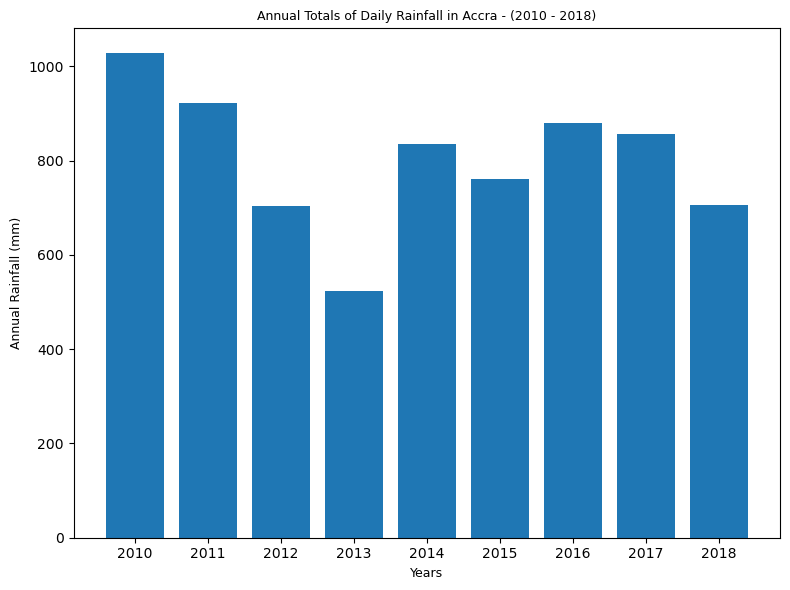

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(annual_tot['year'],annual_tot['precip'])
tick = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
fontsize=9
plt.xlabel('Years', fontsize=fontsize)
plt.ylabel("Annual Rainfall (mm)", fontsize=fontsize)
plt.xticks(ticks=tick)
plt.title("Annual Totals of Daily Rainfall in Accra - (2010 - 2018)", fontsize=fontsize) 
plt.tight_layout()  
#plt.show()
plt.savefig('figures/Annual Totals of Daily Rainfall.png', bbox_inches='tight', dpi=400)

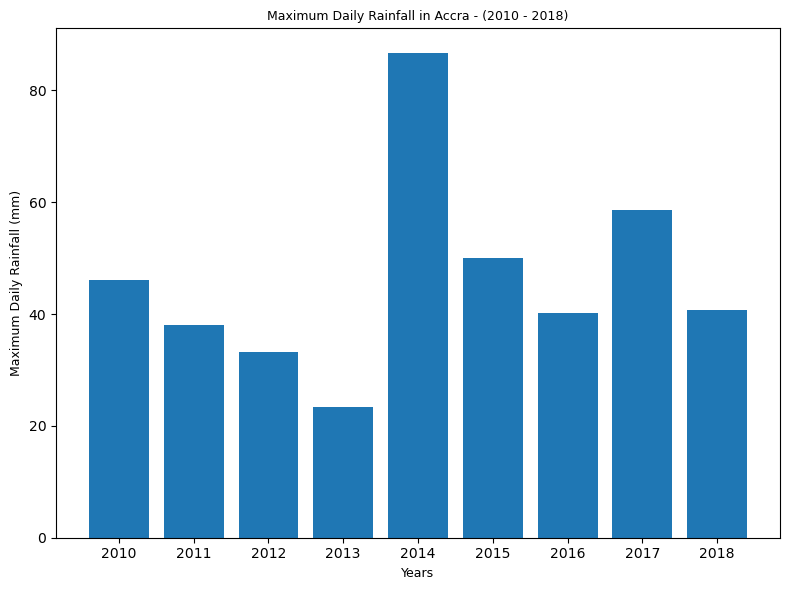

In [12]:
plt.figure(figsize=(8, 6))
tick = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
fontsize=9
plt.bar(max_daily['year'], max_daily['precip'])
plt.xlabel("Years", fontsize=fontsize)
plt.ylabel("Maximum Daily Rainfall (mm)", fontsize=fontsize)
plt.xticks(ticks=tick)
plt.title('Maximum Daily Rainfall in Accra - (2010 - 2018)', fontsize=fontsize)
plt.tight_layout()  
#plt.show()
plt.savefig('figures/Maximum Daily Rainfall in Accra.png', bbox_inches='tight', dpi=400)

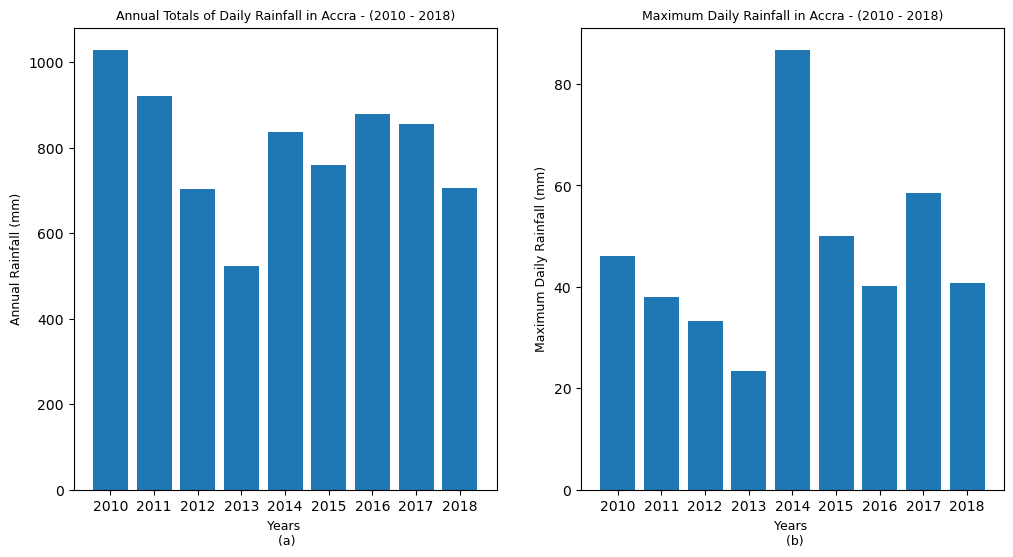

In [13]:

fig,axs = plt.subplots(1,2, figsize=(12,6))
tick = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
fontsize=9
axs[0].bar(annual_tot['year'],annual_tot['precip'])
axs[0].set_xlabel('Years \n (a)', fontsize=fontsize)
axs[0].set_ylabel("Annual Rainfall (mm)", fontsize=fontsize)
axs[0].set_xticks(ticks=tick)
axs[0].set_title("Annual Totals of Daily Rainfall in Accra - (2010 - 2018)", fontsize=fontsize)
axs[1].bar(max_daily['year'], max_daily['precip'])
axs[1].set_xlabel("Years \n (b)", fontsize=fontsize)
axs[1].set_ylabel("Maximum Daily Rainfall (mm)", fontsize=fontsize)
axs[1].set_xticks(ticks=tick)
axs[1].set_title('Maximum Daily Rainfall in Accra - (2010 - 2018)', fontsize=fontsize)
#plt.suptitle("M")
# plt.title("Annual Totals of Precipitation")
plt.savefig("figures/annual_totals_max_2010_2018.png", bbox_inches="tight", dpi=1200)

In [14]:
ds_accra_2014 = ds_accra.sel(time='2014')
ds_accra_2014


<xarray.Dataset>
Dimensions:    (time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-12-31
    longitude  float32 0.125
    latitude   float32 5.625
Data variables:
    precip     (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

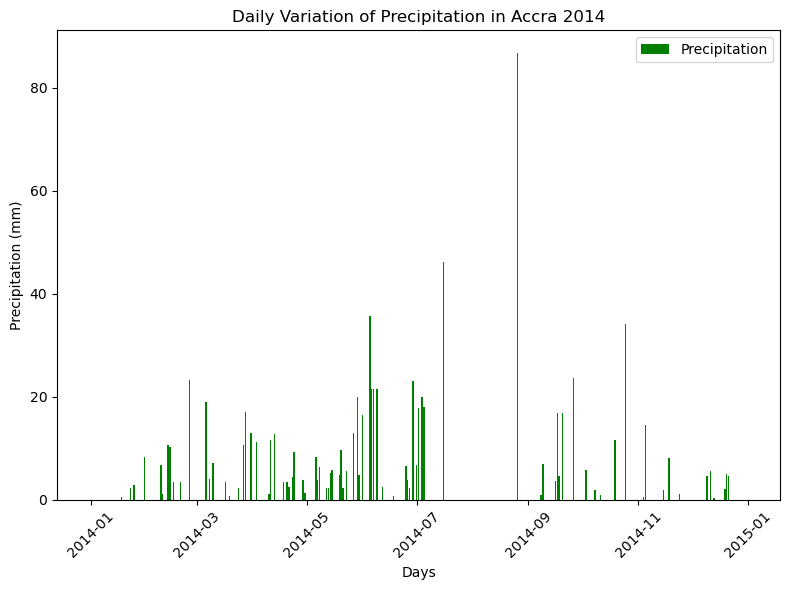

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(ds_accra_2014['time'],ds_accra_2014['precip'], color='green', label='Precipitation')
plt.xlabel('Days')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Variation of Precipitation in Accra 2014')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)  
plt.tight_layout()  
#plt.show()
plt.savefig('figures/Daily_Precipitation_Accra_2014.png', bbox_inches='tight', dpi=1200)

In [16]:
percen_99 = ds_accra_2014.quantile(0.99)
percen_99

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    quantile  float64 0.99
Data variables:
    precip    float64 27.35

In [17]:
high_impact = ds_accra_2014['precip'][ds_accra_2014['precip']>=percen_99['precip']]
high_impact

<xarray.DataArray 'precip' (time: 4)>
array([35.671425, 46.167706, 86.762535, 34.057858], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2014-06-05 2014-07-16 2014-08-26 2014-10-25
    longitude  float32 0.125
    latitude   float32 5.625
    quantile   float64 0.99
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

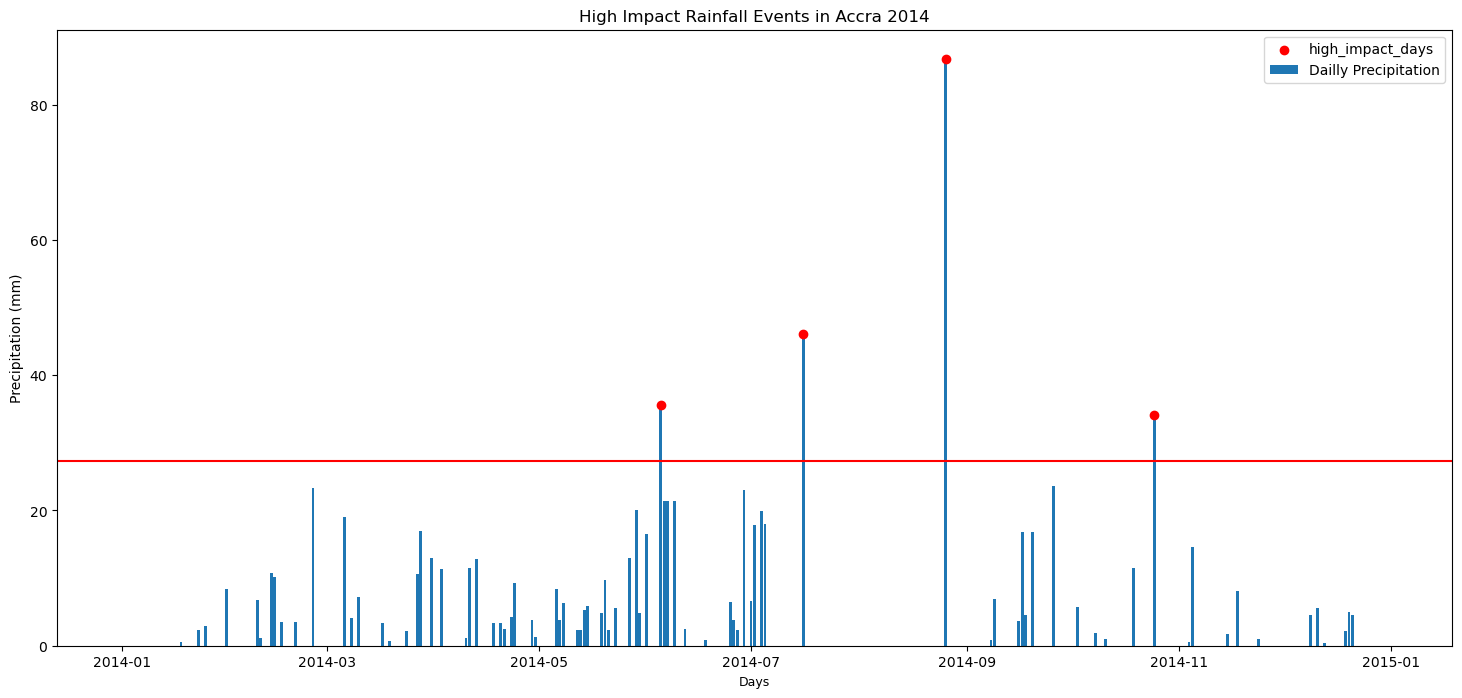

In [226]:
plt.figure(figsize=(18,8))

plt.bar(ds_accra_2014['time'], ds_accra_2014['precip'], label='Dailly Precipitation')
plt.scatter(high_impact['time'], high_impact, color='red', label='high_impact_days')
plt.xlabel('Days',fontsize=fontsize)
plt.ylabel('Precipitation (mm)')
plt.axhline(percen_99['precip'], color='r')
plt.legend()
plt.title('High Impact Rainfall Events in Accra 2014')
plt.savefig('figures/High_Impact_Rainfall_Events_in_Accra_2014.png', bbox_inches='tight', dpi=1200)

In [19]:
pre_ext = ds_accra_2014.where(ds_accra_2014['time.month']>=5, drop=True).where(ds_accra_2014['time.month']<=11, drop=True)
pre_ext

<xarray.Dataset>
Dimensions:    (time: 214)
Coordinates:
  * time       (time) datetime64[ns] 2014-05-01 2014-05-02 ... 2014-11-30
    longitude  float32 0.125
    latitude   float32 5.625
Data variables:
    precip     (time) float32 0.0 0.0 0.0 0.0 0.0 8.373 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [20]:
high_impact.values

array([35.671425, 46.167706, 86.762535, 34.057858], dtype=float32)

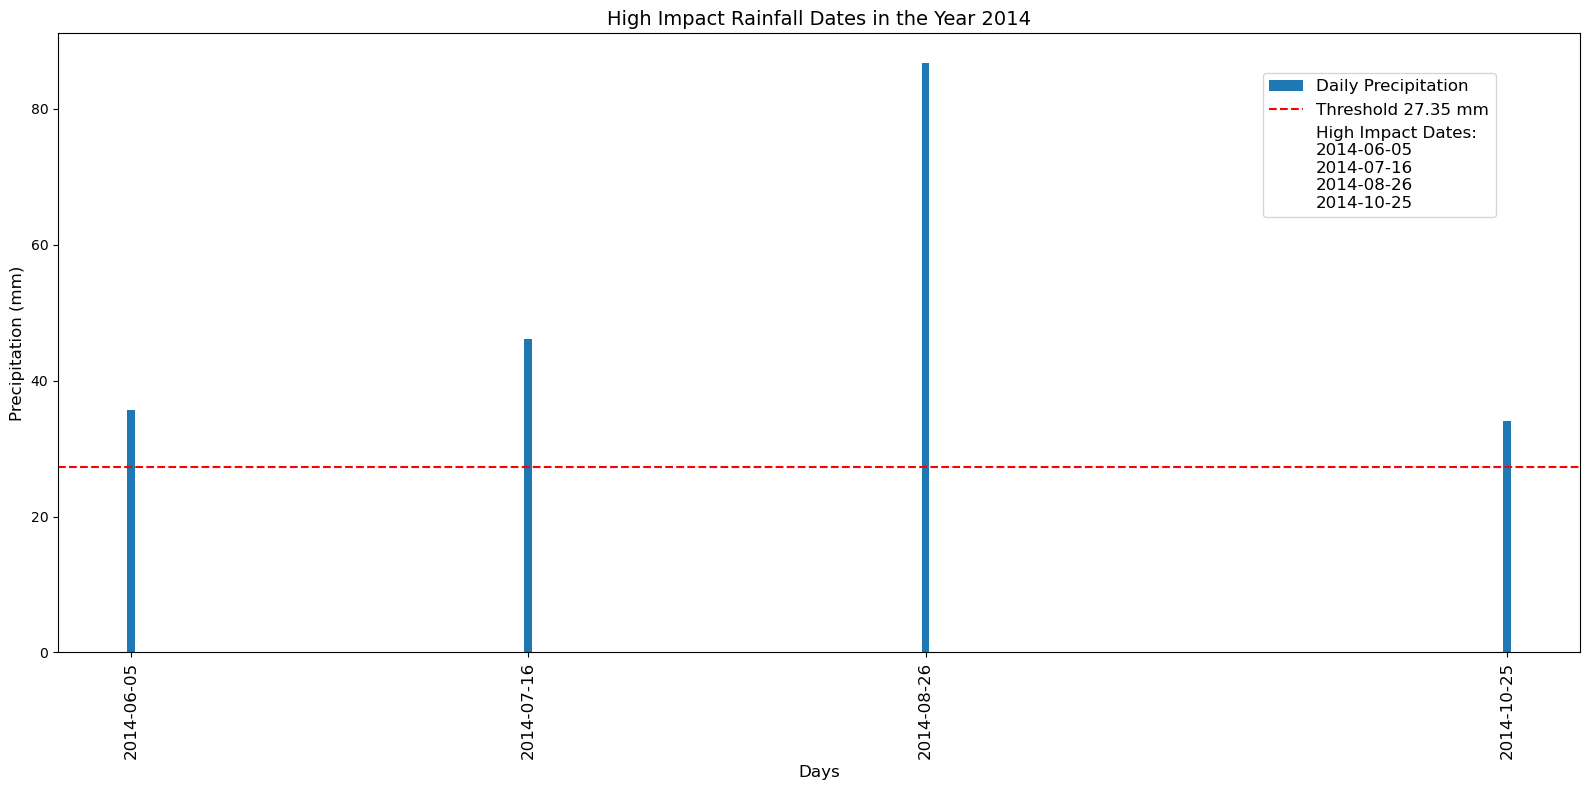

In [21]:

# Extract high impact days
#high_impact = pre_daily.where(pre_daily >= pre_daily_thres, drop=True)

# Convert the dates to pandas datetime for easier manipulation
dates = pd.to_datetime(high_impact['time'].values)
values = high_impact.values

# Additional dates to be labeled
# additional_dates = [
#     '2015-02-22', '2015-04-12', '2015-05-05', '2015-05-23', 
#     '2015-05-28', '2015-05-31','2015-06-03', '2015-06-04', 
#     '2015-06-05', '2015-06-06','2015-06-08', '2015-06-10', 
#     '2015-06-14', '2015-06-28','2015-07-03', '2015-07-16', 
#     '2015-09-01', '2015-10-21','2015-10-31'
# ]

additional_dates = ['2014-06-05', '2014-07-16','2014-08-26','2014-10-25']

# Plotting the high impact days
fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(dates, values, label='Daily Precipitation')

# Adding the threshold line
threshold_line = ax.axhline(percen_99['precip'], color='r', linestyle='--', label=f"Threshold {percen_99['precip']:.2f} mm")

n = 2  # Adjust this value to control spacing
filtered_dates = dates[::1]
filtered_labels = [date.strftime('%Y-%m-%d') for date in filtered_dates]

# Manually set x-ticks and labels with increased font size
ax.set_xticks(filtered_dates)
ax.set_xticklabels(filtered_labels, rotation=90, ha='center', fontsize=12)  # Increased font size

# Custom legend entry for the additional dates
additional_dates_label = '\n'.join(additional_dates)
custom_legend = plt.Line2D([0], [0], color='w', marker='o', linestyle='None', markersize=0, label=f'High Impact Dates:\n{additional_dates_label}')

# Adding all elements to the legend
ax.legend(handles=[bars, threshold_line, custom_legend], bbox_to_anchor=[0.95,0.95], loc='upper right', fontsize=12)

ax.set_xlabel("Days", fontsize=12)
ax.set_ylabel("Precipitation (mm)", fontsize=12)
ax.set_title("High Impact Rainfall Dates in the Year 2014", fontsize=14)
plt.tight_layout()
plt.grid(False)
#plt.show()
plt.savefig("figures/high-impact-rainfall.png", bbox_inches='tight', dpi=1200)

In [22]:
# Sort the dataframe by daily precipitation in descending order
sorted_pre_df = pre_df.sort_values(by='precip', ascending=False).reset_index(drop=True)

# Total number of observations
N = len(sorted_pre_df)

# Convert N from number of days to number of years
N_years = N / 365.25

# Assign ranks to each rainfall event
sorted_pre_df['rank'] = sorted_pre_df.index + 1

# Calculate return periods in years
sorted_pre_df['return_period_years'] = (N_years + 1) / sorted_pre_df['rank']

print(sorted_pre_df[['time', 'precip', 'rank', 'return_period_years']])

           time     precip  rank  return_period_years
0    2014-08-26  86.762535     1             9.999316
1    2017-06-26  58.585182     2             4.999658
2    2015-07-10  50.039021     3             3.333105
3    2014-07-16  46.167706     4             2.499829
4    2010-08-20  46.089111     5             1.999863
...         ...        ...   ...                  ...
3282 2013-08-04   0.000000  3283             0.003046
3283 2013-08-05   0.000000  3284             0.003045
3284 2013-08-06   0.000000  3285             0.003044
3285 2013-08-08   0.000000  3286             0.003043
3286 2018-12-31   0.000000  3287             0.003042

[3287 rows x 4 columns]


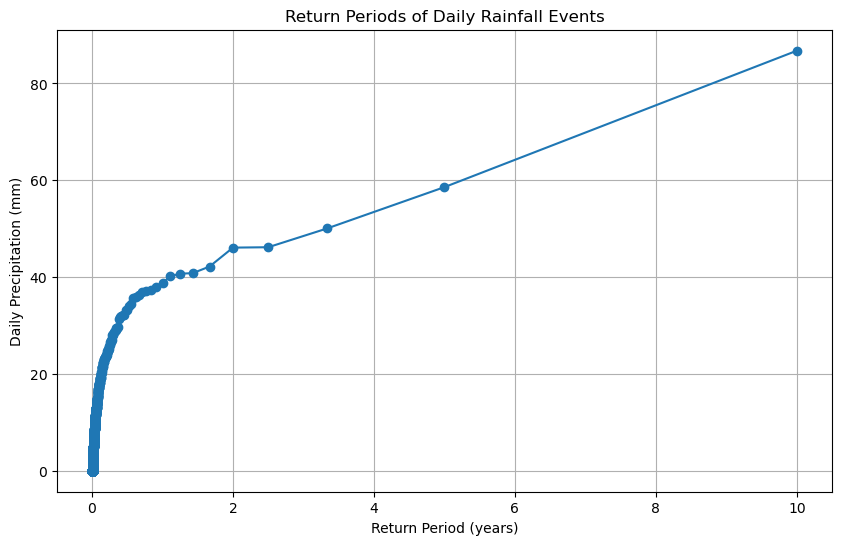

In [23]:


plt.figure(figsize=(10, 6))
plt.plot(sorted_pre_df['return_period_years'], sorted_pre_df['precip'], marker='o', linestyle='-')
#plt.xscale('log')
plt.xlabel('Return Period (years)')
plt.ylabel('Daily Precipitation (mm)')
plt.title('Return Periods of Daily Rainfall Events')
plt.grid(True)
plt.show()


In [24]:
drives = "D:/"
os.listdir(drives)

['BEEF',
 'cape_and_stuff.nc',
 'Carnival Row',
 'ch PROJECT.ipynb',
 'chirps_21_WA_new.nc',
 'Chl.ds.Ply.2019.720p.wb-dl.x265.HEVC.Film2Movie_WS.mkv',
 'combined_data.nc',
 'ConveTransfer.msi',
 'data',
 'DESTINY',
 'era.nc',
 'everything-1.4.1.1024-installer.exe',
 'Flet',
 'hms_prj',
 'Hotel Management',
 'House.of.Ninjas.S01.COMPLETE.DUAL-AUDIO.JAP-ENG.1080p.10bit.WEBRip.6CH.x265.HEVC-PSA',
 'imerg_v07_daily_new.nc4',
 'KMS_VL_ALL_AIO_crackshash.zip',
 'new_era.nc',
 'Oppenheimer.2023.720p.BluRay.x264.YouthTrendx.mkv',
 'OUR DREAM WEDDING - CHINELO EJIANWU, JAMES GARDINER, PRECIOUS AKAEZE latest 2024 nigerian movies.mp4',
 'Rainfall_Ghana.csv',
 'Reacher',
 'System Volume Information']

In [187]:
das = xr.open_dataset("D:/Cape_and_stuff.nc")

In [188]:
das = das.sel(latitude=5.6, longitude=0.17, method='nearest')
das

<xarray.Dataset>
Dimensions:    (time: 8760)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    cape       (time) float32 ...
    cin        (time) float32 ...
    msl        (time) float32 ...
    tp         (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 01:38:46 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [189]:
ds_day_before = das.sel(time='2014-08-25')
ds_day_during = das.sel(time='2014-08-26')
ds_day_end = das.sel(time='2014-08-27')


ds_day_cape_before = ds_day_before['cape'].resample(time='1H').sum("time")
ds_day_cape_during = ds_day_during['cape'].resample(time='1H').sum("time")
ds_day_cape_end = ds_day_end['cape'].resample(time='1H').sum("time")


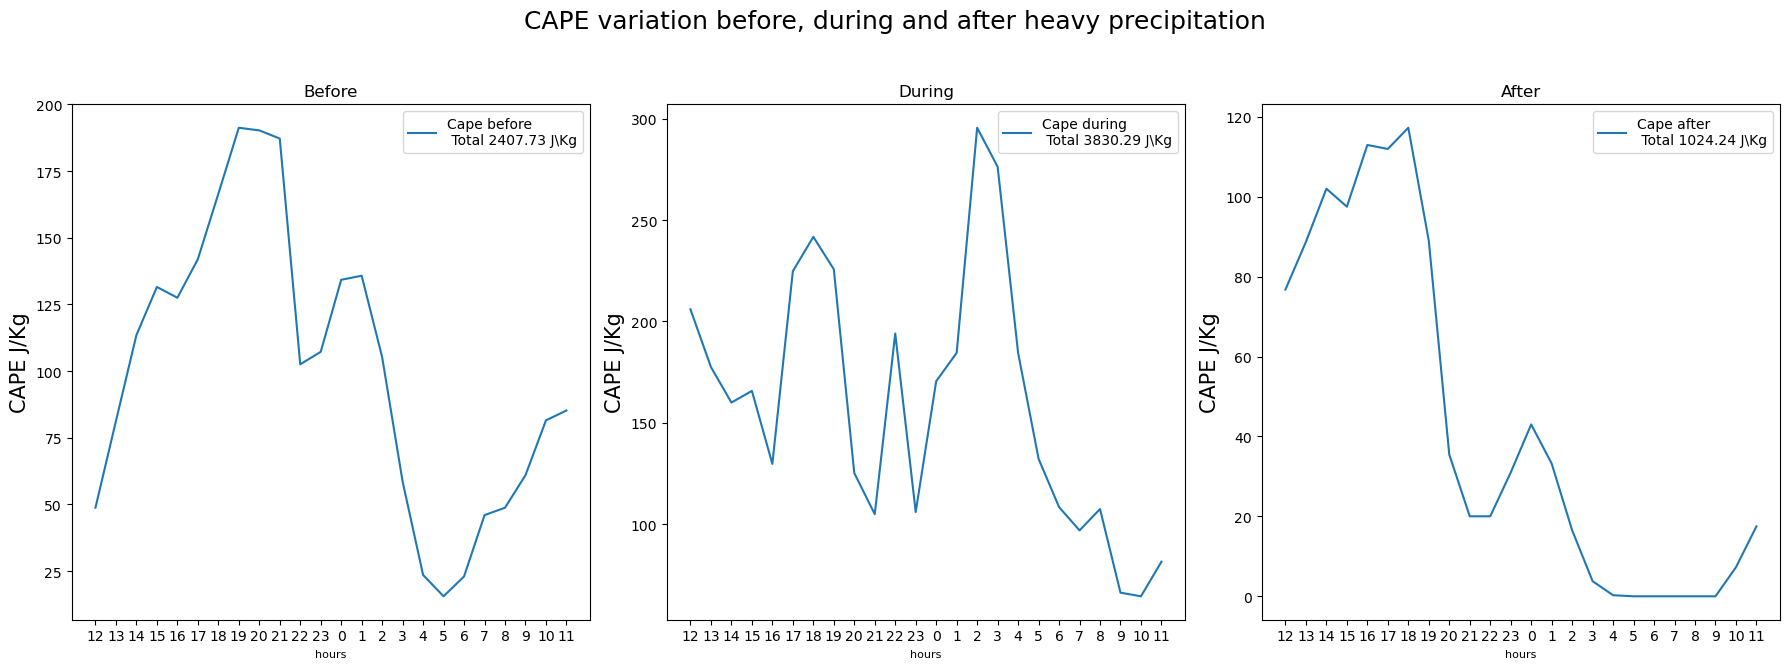

In [190]:
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
hours = 'hours'

# Assuming the data has 24 points representing each hour of the day
hour_labels = [str((i + 12) % 24) for i in range(24)]
cape = 'CAPE J/Kg'

# Plot for "Before"
ax[0].plot(ds_day_cape_before, label=f'Cape before \n Total {ds_day_cape_before.sum().values:.2f} J\Kg')
ax[0].set_xlabel(hours, fontsize=8)
ax[0].set_ylabel(cape, fontsize=15)
ax[0].set_title('Before')
ax[0].legend()
ax[0].set_xticks(range(24))
ax[0].set_xticklabels(hour_labels)

# Plot for "During"
ax[1].plot(ds_day_cape_during, label=f'Cape during \n Total {ds_day_cape_during.sum().values:.2f} J\Kg')
ax[1].set_xlabel(hours, fontsize=8)
ax[1].set_ylabel(cape, fontsize=15)
ax[1].set_title('During')
ax[1].legend()
ax[1].set_xticks(range(24))
ax[1].set_xticklabels(hour_labels)

# Plot for "After"
ax[2].plot(ds_day_cape_end, label=f'Cape after \n Total {ds_day_cape_end.sum().values:.2f} J\Kg')
ax[2].set_xlabel(hours, fontsize=8)
ax[2].set_ylabel(cape, fontsize=15)
ax[2].set_title('After')
ax[2].legend()
ax[2].set_xticks(range(24))
ax[2].set_xticklabels(hour_labels)

plt.suptitle('CAPE variation before, during and after heavy precipitation', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

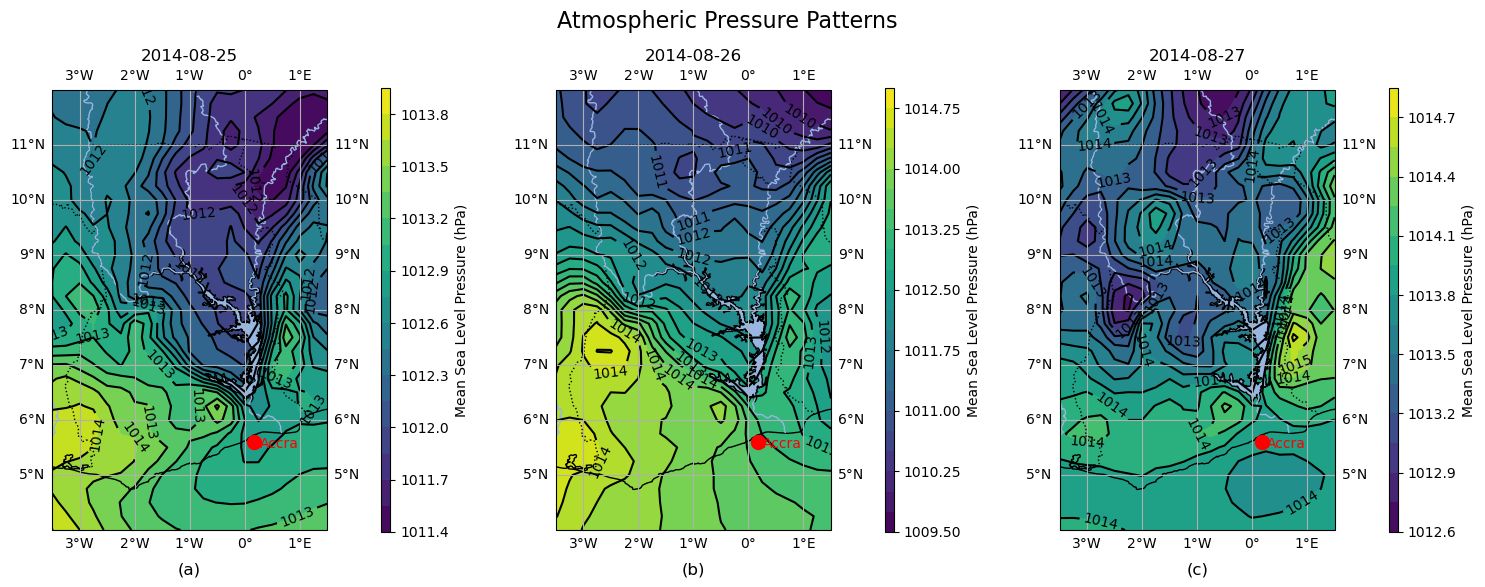

In [225]:
# Define the location
latitude = 5.6
longitude = 0.17

dataset = xr.open_dataset("D:/Cape_and_stuff.nc")

# Extract the mean sea level pressure for the specified dates
dates = ['2014-08-25', '2014-08-26', '2014-08-27']
msl = dataset['msl'].sel(time=dates, method='nearest')

# Convert mean sea level pressure from Pa to hPa
msl_hpa = msl / 100.0

# Function to plot atmospheric pressure patterns for a specific date
def plot_pressure_patterns(ax, msl, date, latitude, longitude):
    # Plot mean sea level pressure as filled contours
    msl_contourf = ax.contourf(msl['longitude'], msl['latitude'], msl.sel(time=date), cmap='viridis', levels=20, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(msl_contourf, ax=ax, orientation='vertical', pad=0.14, aspect=50)
    cbar.set_label('Mean Sea Level Pressure (hPa)')
    
    # Plot mean sea level pressure as contour lines
    msl_contour = ax.contour(msl['longitude'], msl['latitude'], msl.sel(time=date), colors='black', levels=20, transform=ccrs.PlateCarree())
    ax.clabel(msl_contour, inline=True, fontsize=10, fmt='%1.0f')
    
    # Mark the specific location (Accra)
    ax.plot(longitude, latitude, marker='o', color='red', markersize=10, transform=ccrs.PlateCarree())
    ax.text(longitude + 0.1, latitude - 0.1, 'Accra', color='red', transform=ccrs.PlateCarree())
    
    # Add geographic features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)
    
    # Title and labels
    ax.set_title(f'{date}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.gridlines(draw_labels=True)  # Add this line to show longitude and latitude labels
    

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Plot for each date in a separate subplot
for ax, date in zip(axs, dates):
    plot_pressure_patterns(ax, msl_hpa, date, latitude, longitude)

# Add subplot labels (a, b, c)
labels = ['(a)', '(b)', '(c)']
for ax, label in zip(axs, labels):
    ax.annotate(label, xy=(0.5, -0.1), xycoords='axes fraction', fontsize=12, ha='center')

# Add a suptitle and adjust the layout
plt.suptitle("Atmospheric Pressure Patterns", fontsize=16)
plt.subplots_adjust(top=0.85, wspace=0.3)  # Adjust spacing as needed

# Save the figure
plt.savefig("figures/atmospheric_press.png", bbox_inches='tight', dpi=1200)
#plt.show()

In [228]:
da = xr.open_dataset('D:/combined.nc')

In [229]:
da = da.sel(latitude=5.6, longitude=0.17, method='nearest')
da

<xarray.Dataset>
Dimensions:    (level: 12, time: 8760)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * level      (level) int32 200 250 350 450 550 650 750 800 850 900 950 1000
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    u          (time, level) float32 ...
    v          (time, level) float32 ...
    t          (time, level) float32 ...
    r          (time, level) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-03 14:09:28 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [230]:
# Define the dates for the day before, the day of, and the day after the heavy precipitation
day_before = pd.to_datetime('2014-08-25')
day_of = pd.to_datetime('2014-08-26')
day_after = pd.to_datetime('2014-08-27')

# Extract the time range for the selected dates
time_before = da.sel(time=slice(day_before, day_before + pd.Timedelta(days=1) - pd.Timedelta(seconds=1)))
time_of = da.sel(time=slice(day_of, day_of + pd.Timedelta(days=1) - pd.Timedelta(seconds=1)))
time_after = da.sel(time=slice(day_after, day_after + pd.Timedelta(days=1) - pd.Timedelta(seconds=1)))

# Combine all the time ranges
time_range = xr.concat([time_before, time_of, time_after], dim='time')

# Extract u and v components
u = time_range['u']
v = time_range['v']

# Define the pressure levels (e.g., 850 hPa and 500 hPa)
pressure_level_1 = 850
pressure_level_2 = 200

# # Select data at the defined pressure levels
# u_850 = u.sel(level=pressure_level_1, method='nearest')
# u_500 = u.sel(level=pressure_level_2, method='nearest')
# v_850 = v.sel(level=pressure_level_1, method='nearest')
# v_500 = v.sel(level=pressure_level_2, method='nearest')

In [231]:
# Calculate wind shear magnitude
def calculate_wind_shear(u, v, p1, p2):
    u1 = u.sel(level=p1, method='nearest')
    v1 = v.sel(level=p1, method='nearest')
    u2 = u.sel(level=p2, method='nearest')
    v2 = v.sel(level=p2, method='nearest')
    shear_magnitude = np.sqrt((u2 - u1)**2 + (v2 - v1)**2)
    return shear_magnitude

# Calculate wind shear for each time step
wind_shear = calculate_wind_shear(u, v, pressure_level_1, pressure_level_2)

In [232]:
wind_shear

<xarray.DataArray (time: 72)>
array([18.340996 , 17.298328 , 15.784159 , 14.522472 , 13.247855 ,
       11.858911 , 10.610041 ,  9.453228 ,  8.009945 ,  6.1095037,
        4.20649  ,  2.7189631,  1.8900356,  1.8095165,  2.1482122,
        2.906941 ,  4.6302   ,  7.0682154,  8.722946 , 10.381797 ,
       12.150429 , 12.891784 , 10.64083  , 10.303741 , 13.244505 ,
       17.219484 , 20.177801 , 22.382008 , 22.063324 , 21.878717 ,
       23.154818 , 24.985857 , 27.83911  , 21.24027  , 17.754066 ,
       16.545385 , 16.88163  , 17.361647 , 17.850433 , 20.981693 ,
       24.478897 , 25.299154 , 25.34967  , 25.43077  , 24.114435 ,
       23.028591 , 23.494797 , 23.564161 , 24.082943 , 24.437187 ,
       23.401377 , 21.698795 , 20.205927 , 18.390057 , 16.383753 ,
       14.756349 , 13.706345 , 14.057964 , 14.610606 , 18.06198  ,
       19.011297 , 18.640903 , 19.079044 , 19.924484 , 19.414795 ,
       18.570877 , 18.444002 , 19.128149 , 20.853132 , 21.606024 ,
       21.582336 , 21.703115 ], dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2014-08-25 ... 2014-08-27T23:00:00

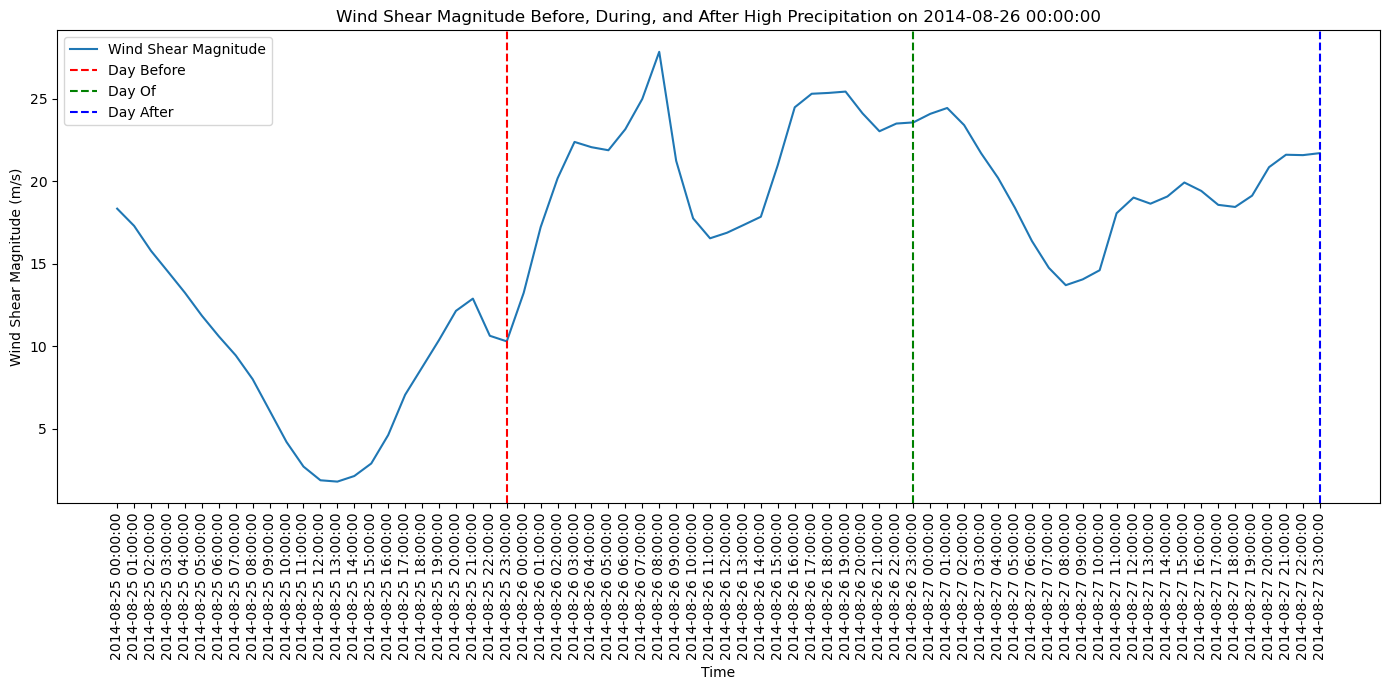

In [233]:
# Plotting
plt.figure(figsize=(14, 7))

# Convert time to a more readable format
time_hours = [pd.to_datetime(str(time.values)).strftime('%Y-%m-%d %H:%M:%S') for time in wind_shear.time]

plt.plot(time_hours, wind_shear, label='Wind Shear Magnitude')

# Adding vertical lines to separate days
plt.axvline(x=pd.to_datetime(str(day_before) + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='r', linestyle='--', label='Day Before')
plt.axvline(x=pd.to_datetime(str(day_of) + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='g', linestyle='--', label='Day Of')
plt.axvline(x=pd.to_datetime(str(day_after) + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='b', linestyle='--', label='Day After')

plt.xlabel('Time')
plt.ylabel('Wind Shear Magnitude (m/s)')
plt.title(f'Wind Shear Magnitude Before, During, and After High Precipitation on {day_of}')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig("figures/wind_shear.png", bbox_inches='tight', dpi=1200)

In [198]:
t_r = da[['t','r']]

day_before = t_r.sel(time='2014-08-25')
day_of = t_r.sel(time='2014-08-26')
day_after = t_r.sel(time='2014-08-27')

In [199]:
def calculate_dew_point(t, r):
    temp = t - 273.15
    dew_p = temp - ((100 - r)/5)
    return dew_p

In [200]:
dew_point_before = calculate_dew_point(day_before['t'], day_before['r'])
dew_point_during = calculate_dew_point(day_of['t'], day_of['r'])
dew_point_after = calculate_dew_point(day_after['t'], day_after['r'])

In [201]:
dew_point_before_level = dew_point_before.groupby('level').mean(dim='time').sortby('level', ascending=False)
dew_point_during_level = dew_point_during.groupby('level').mean(dim='time').sortby('level', ascending=False)
dew_point_after_level = dew_point_after.groupby('level').mean(dim='time').sortby('level', ascending=False)

In [202]:
level = t_r['level'].sortby('level',ascending=False)
level

<xarray.DataArray 'level' (level: 12)>
array([1000,  950,  900,  850,  800,  750,  650,  550,  450,  350,  250,  200])
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * level      (level) int32 1000 950 900 850 800 750 650 550 450 350 250 200
Attributes:
    units:      millibars
    long_name:  pressure_level

In [203]:
def convert_temp(t):
    temp = t - 273.15
    return temp

temp_before = convert_temp(day_before['t'])
temp_during = convert_temp(day_of['t'])
temp_after = convert_temp(day_after['t'])

In [204]:
temp_before_level = temp_before.groupby('level').mean(dim='time').sortby('level', ascending=False)
temp_during_level = temp_during.groupby('level').mean(dim='time').sortby('level', ascending=False)
temp_after_level = temp_after.groupby('level').mean(dim='time').sortby('level', ascending=False)


In [205]:
rh_before_level = day_before['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)
rh_during_level = day_of['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)
rh_after_level = day_after['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)

In [206]:
before_data = {
    'PRES': level,
    #'HGHT': geometric_height_level,
    "TEMP": temp_before_level,
    "DWPT":dew_point_before_level,
    "RELH": rh_before_level,
}


during_data = {
    'PRES': level,
    #'HGHT': geometric_height_level,
    "TEMP": temp_during_level,
    "DWPT":dew_point_during_level,
    "RELH": rh_during_level,
}


after_data = {
    'PRES': level,
    #'HGHT': geometric_height_level,
    "TEMP": temp_after_level,
    "DWPT":dew_point_after_level,
    "RELH": rh_after_level,
}


before_data = pd.DataFrame(before_data)
during_data = pd.DataFrame(during_data)
after_data = pd.DataFrame(after_data)

In [207]:
# Before the heavy precipitation
p_before = before_data['PRES'].astype(float)
#z_before = before_data['HGHT'].astype(float)
t_before = before_data['TEMP'].astype(float)
td_before = before_data['DWPT'].astype(float)


# During the heavy precipitation
p_during = during_data['PRES'].astype(float)
#z_during = during_data['HGHT'].astype(float)
t_during = during_data['TEMP'].astype(float)
td_during = during_data['DWPT'].astype(float)


# After the heavy precipitation
p_after = after_data['PRES'].astype(float)
#z_after = after_data['HGHT'].astype(float)
t_after = after_data['TEMP'].astype(float)
td_after = after_data['DWPT'].astype(float)

In [208]:
# # Create the figure and subplots
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# fig.clear()
# # Define a function to create a tephigram
# def create_tephigram(ax, p, t, td, z, title):
#     teph = SkewT(fig, rotation=45, subplot=(1, 3, ax))
#     teph.plot(p, t, 'r', label='Temperature')
#     teph.plot(p, td, 'g', label='Dew-Point')
#     teph.plot_dry_adiabats()
#     teph.plot_moist_adiabats()
#     teph.plot_mixing_lines()

#     # Add axis labels and a title to the tephigram
#     teph.ax.set_xlabel('Temperature (°C)', fontsize=10)
#     teph.ax.set_ylabel('Pressure (hPa)', fontsize=10)
#     teph.ax.set_title(title, fontsize=12)
#     teph.ax.legend()
    

# # Create tephigrams for each dataset
# create_tephigram(ax=1, p=p_before, t=t_before, td=td_before, z=level, title='Before High Impact Precipitation')
# create_tephigram(ax=2, p=p_during, t=t_during, td=td_during, z=level, title='During High Impact Precipitation')
# create_tephigram(ax=3, p=p_after, t=t_after, td=td_after, z=level, title='After High Impact Precipitation')

# plt.suptitle('Tephigram', fontsize=15)
# #plt.legend()
# # Show the plot
# plt.tight_layout()

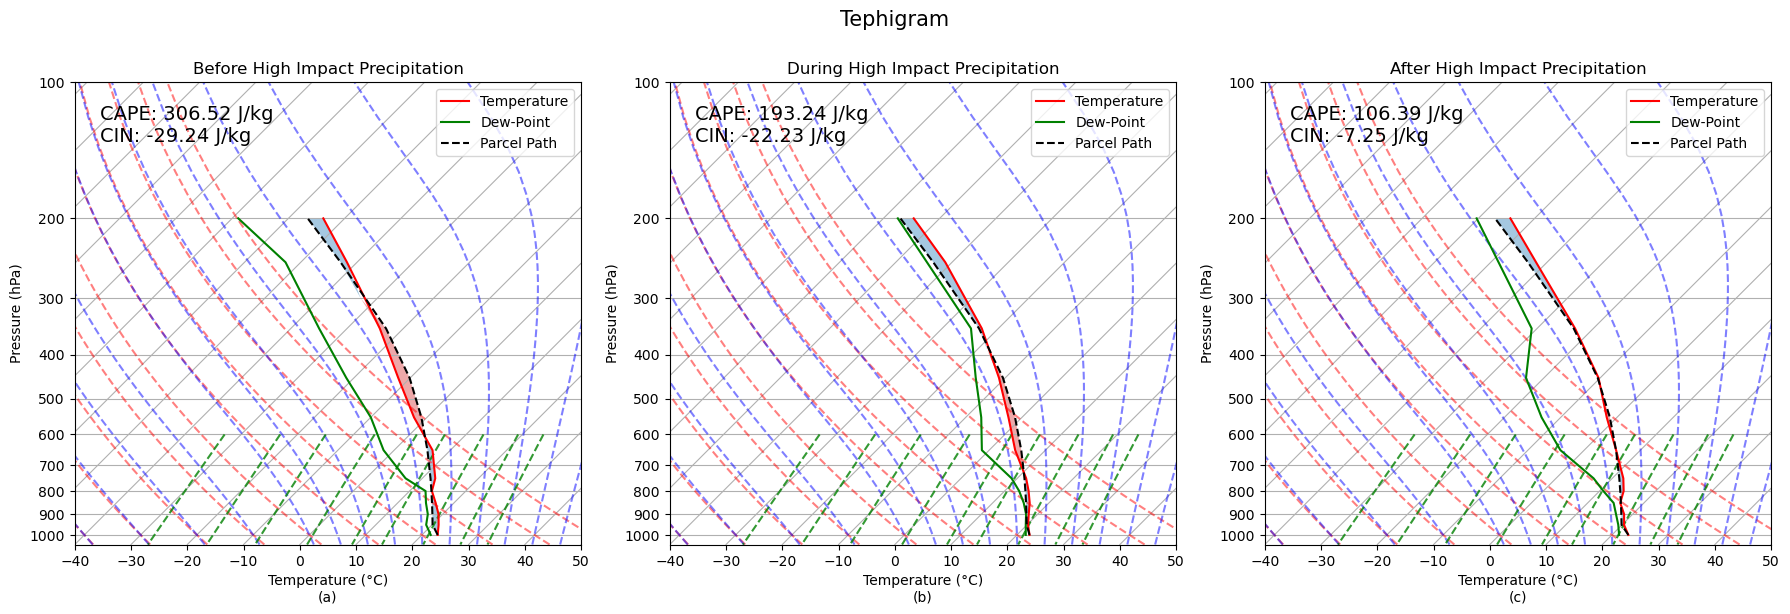

In [264]:

# Ensure your before, during, and after data are in numpy arrays and have appropriate units
p_before = np.array(before_data['PRES']).astype(float) * units.hPa
t_before = np.array(before_data['TEMP']).astype(float) * units.degC
td_before = np.array(before_data['DWPT']).astype(float) * units.degC

p_during = np.array(during_data['PRES']).astype(float) * units.hPa
t_during = np.array(during_data['TEMP']).astype(float) * units.degC
td_during = np.array(during_data['DWPT']).astype(float) * units.degC

p_after = np.array(after_data['PRES']).astype(float) * units.hPa
t_after = np.array(after_data['TEMP']).astype(float) * units.degC
td_after = np.array(after_data['DWPT']).astype(float) * units.degC

def calculate_cape_cin(p, t, td):
    parcel_prof = parcel_profile(p, t[0], td[0]).to('degC')
    cape, cin = cape_cin(p, t, td, parcel_prof)
    return cape.to('J/kg'), cin.to('J/kg'), parcel_prof

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.clear()

# Define a function to create a tephigram
def create_tephigram(ax, p, t, td, title, label):
    skew = SkewT(fig, rotation=45, subplot=(1, 3, ax))
    skew.plot(p, t, 'r', label='Temperature')
    skew.plot(p, td, 'g', label='Dew-Point')
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()

    # Calculate CAPE, CIN, and parcel profile
    cape, cin, parcel_prof = calculate_cape_cin(p, t, td)

    # Plot parcel profile
    skew.plot(p, parcel_prof, 'k', linestyle='--', label='Parcel Path')

    # Shade the CAPE area
    skew.shade_cape(p, t, parcel_prof)

    # Shade the CIN area
    skew.shade_cin(p, t, parcel_prof)

    # Add axis labels and a title to the tephigram
    skew.ax.set_xlabel(f'Temperature (°C)\n{label}', fontsize=10)
    skew.ax.set_ylabel('Pressure (hPa)', fontsize=10)
    skew.ax.set_title(title, fontsize=12)
    skew.ax.legend()

    # Annotate CAPE and CIN values
    skew.ax.annotate(f'CAPE: {cape.magnitude:.2f} J/kg\nCIN: {cin.magnitude:.2f} J/kg', xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=14, color='k', ha='left', va='top')

# Create tephigrams for each dataset
create_tephigram(ax=1, p=p_before, t=t_before, td=td_before, title='Before High Impact Precipitation', label='(a)')
create_tephigram(ax=2, p=p_during, t=t_during, td=td_during, title='During High Impact Precipitation', label='(b)')
create_tephigram(ax=3, p=p_after, t=t_after, td=td_after, title='After High Impact Precipitation', label='(c)')

plt.suptitle('Tephigram', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
plt.savefig("figures/tephigram.png", bbox_inches='tight', dpi=1200)

In [210]:
rh_before_level = day_before['r'].groupby('time').mean(dim='level')#.sortby('level', ascending=False)
rh_during_level = day_of['r'].groupby('time').mean(dim='level')#.sortby('level', ascending=False)
rh_after_level = day_after['r'].groupby('time').mean(dim='level')#.sortby('level', ascending=False)

In [251]:
rh_during_level.values.max()

96.1562

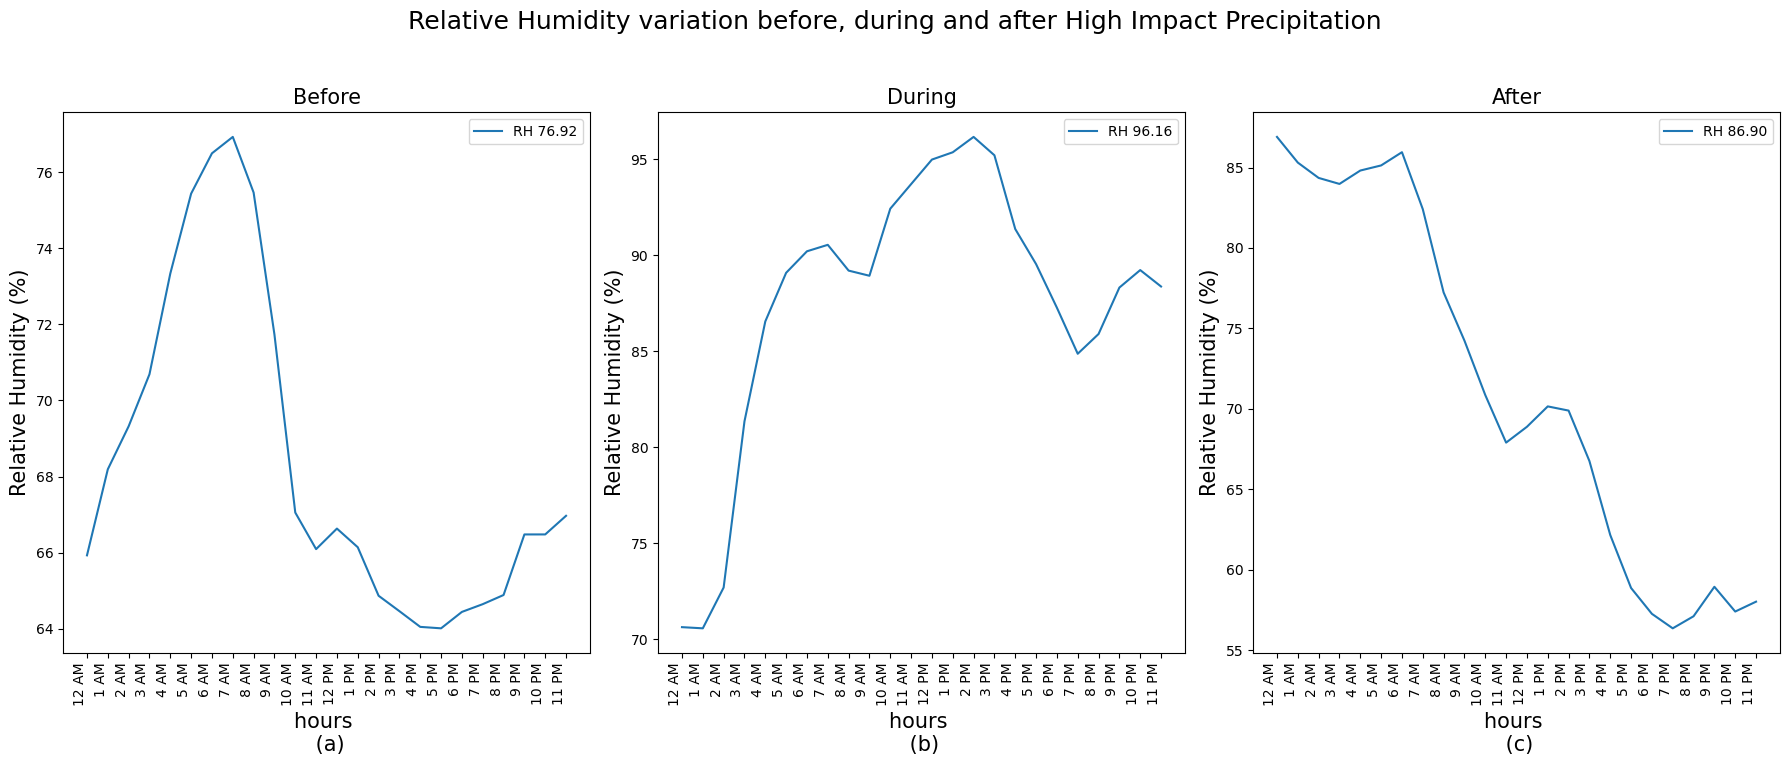

In [253]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
hours = 'hours'

# Assuming the data has 24 points representing each hour of the day
# Generate hour labels from 0 AM to 23 PM
hour_labels = [f'{i % 12} AM' if i < 12 else f'{i % 12} PM' for i in range(24)]
hour_labels[0] = '12 AM'  # Adjust 0 to 12 AM
hour_labels[12] = '12 PM'  # Adjust 12 to 12 PM

cape = 'Relative Humidity (%)'

# Plot for "Before"
ax[0].plot(rh_before_level, label=f'RH {rh_before_level.values.max():.2f}')
ax[0].set_xlabel(f"{hours} \n (a)", fontsize=15)
ax[0].set_ylabel(cape, fontsize=15)
ax[0].set_title('Before', fontsize=15)
ax[0].legend()
ax[0].set_xticks(range(24))
ax[0].set_xticklabels(hour_labels, rotation=90, ha='right')

# Plot for "During"
ax[1].plot(rh_during_level, label=f'RH {rh_during_level.values.max():.2f}')
ax[1].set_xlabel(f"{hours} \n (b)", fontsize=15)
ax[1].set_ylabel(cape, fontsize=15)
ax[1].set_title('During', fontsize=15)
ax[1].legend()
ax[1].set_xticks(range(24))
ax[1].set_xticklabels(hour_labels, rotation=90, ha='right')

# Plot for "After"
ax[2].plot(rh_after_level, label=f'RH {rh_after_level.values.max():.2f}')
ax[2].set_xlabel(f"{hours} \n (c)", fontsize=15)
ax[2].set_ylabel(cape, fontsize=15)
ax[2].set_title('After', fontsize=15)
ax[2].legend()
ax[2].set_xticks(range(24))
ax[2].set_xticklabels(hour_labels, rotation=90, ha='right')

plt.suptitle('Relative Humidity variation before, during and after High Impact Precipitation', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
plt.savefig("figures/rh.png", bbox_inches='tight', dpi=1200)


In [149]:
rh_during_level

<xarray.DataArray 'r' (time: 24)>
array([70.625336, 70.56439 , 72.689064, 81.342   , 86.54606 , 89.07855 ,
       90.19938 , 90.535614, 89.19329 , 88.92514 , 92.41739 , 93.69702 ,
       94.975975, 95.35574 , 96.1562  , 95.20007 , 91.35888 , 89.53335 ,
       87.2612  , 84.86316 , 85.891884, 88.30996 , 89.22098 , 88.36567 ],
      dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2014-08-26 ... 2014-08-26T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [66]:


# drive = "D:/data/*.nc"
# files = glob.glob(drive)
# u_files = [file for file in files if 'u' in xr.open_dataset(file, engine='netcdf4')]
# v_files = [file for file in files if 'v' in xr.open_dataset(file, engine='netcdf4')]
# temp_files = [file for file in files if 't' in xr.open_dataset(file, engine='netcdf4')]
# rh_files = [file for file in files if 'r' in xr.open_dataset(file, engine='netcdf4')]
# #ver_files = [file for file in files if 'w' in xr.open_dataset(file, engine='netcdf4')]

# ds_v = xr.open_mfdataset(v_files, combine='nested', concat_dim='time', chunks={}, engine='netcdf4')
# ds_u = xr.open_mfdataset(u_files, combine='nested', concat_dim='time', chunks={}, engine='netcdf4')
# ds_temp = xr.open_mfdataset(temp_files, combine='nested', concat_dim='time', chunks={}, engine='netcdf4')
# ds_rh = xr.open_mfdataset(rh_files, combine='nested', concat_dim='time', chunks={}, engine='netcdf4')
# #ds_ver = xr.open_mfdataset(ver_files, combine='nested', concat_dim='time', chunks={}, engine='netcdf4')

# # Merge the two datasets
# ds = xr.merge([ds_u, ds_v, ds_temp, ds_rh])
# ds.to_netcdf('D:/combined.nc')